Shape of data: (41188, 21)
Sample data:
    age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.i

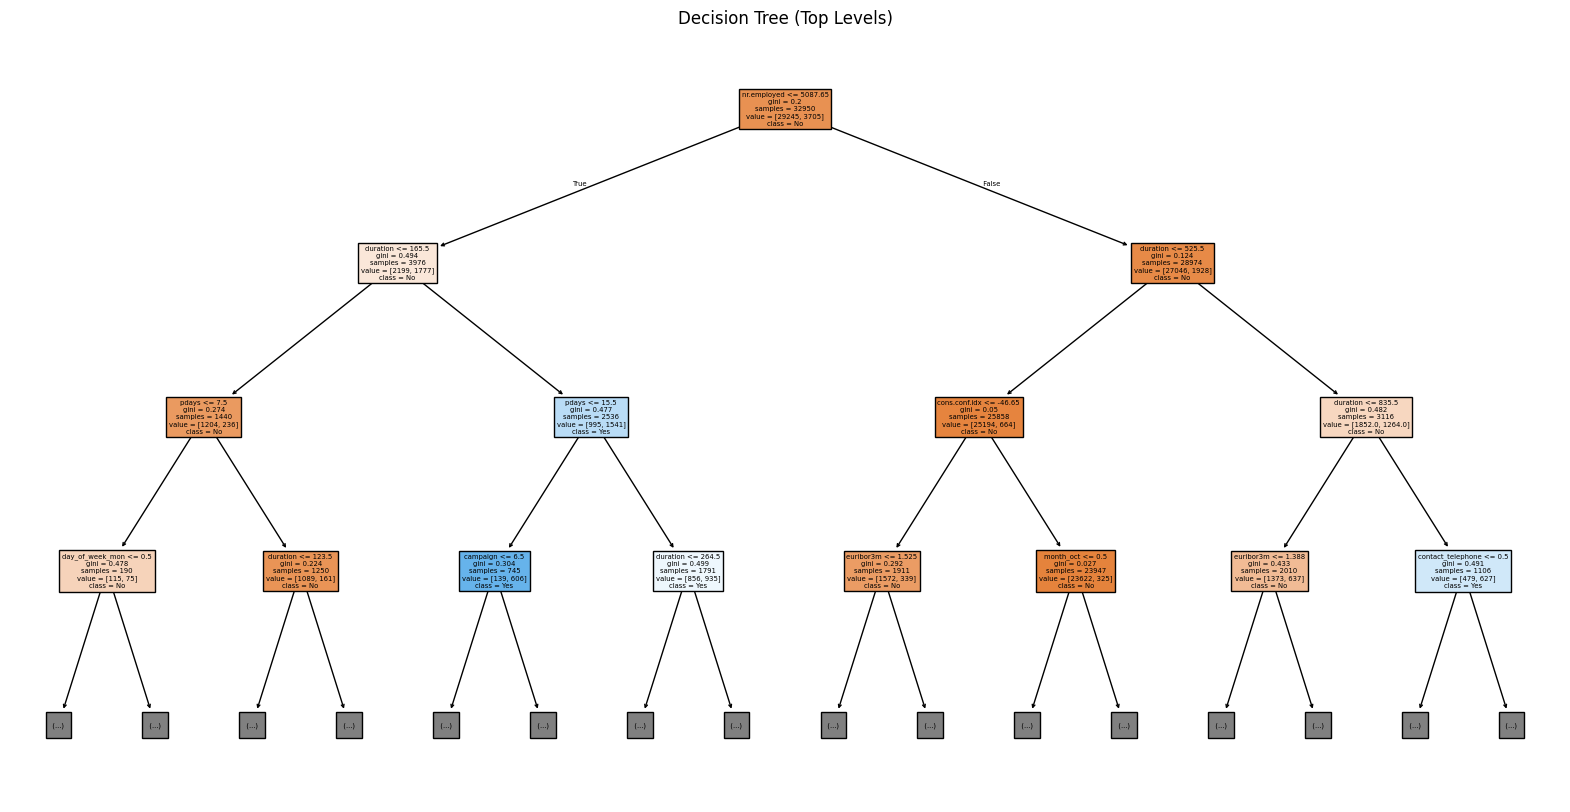

In [7]:
# STEP 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import tree

# STEP 2: Load the Dataset
df = pd.read_csv('bank-additional-full.csv', sep=';')  # adjust path if needed
print("Shape of data:", df.shape)
print("Sample data:\n", df.head())

# STEP 3: Encode the target variable ('y')
le = LabelEncoder()
df['y'] = le.fit_transform(df['y'])  # 'yes' → 1, 'no' → 0

# STEP 4: One-hot encode categorical columns
df_encoded = pd.get_dummies(df.drop('y', axis=1))  # convert text columns to binary columns
X = df_encoded
y = df['y']

# STEP 5: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 6: Train a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# STEP 7: Make predictions
y_pred = model.predict(X_test)

# STEP 8: Evaluate the model
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# STEP 9: Visualize the Tree (Optional - limit depth for readability)
plt.figure(figsize=(20,10))
tree.plot_tree(model, max_depth=3, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.title("Decision Tree (Top Levels)")
plt.show()
